In [5]:
import pandas as pd
import numpy as np
import keras
import re
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D
from keras .layers import Dense,Dropout,Activation,Flatten
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from google.colab import drive


In [8]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_test=pd.read_csv(r'/content/drive/My Drive/hackathon_deep_learning/hackathon_images_test.csv') # loading the test data

In [0]:
df_train=pd.read_csv(r'/content/drive/My Drive/hackathon_deep_learning/hackathon_images_train.csv')# loading the train data

In [0]:
train=df_train # making  a copy of the main file to avoid informarion loss

## Unnderstanding the data

In [12]:
train.head()

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Faces_easy,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,airplanes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,Leopards,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,Faces,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0


 The train data consists of 10000 inidependent variables and one target variable

In [13]:
train.shape

(1671, 10001)

The given set of data contains 1671 images inn total

In [0]:
counts=train['Labels'].value_counts()

In [15]:
counts

Motorbikes     488
airplanes      275
Faces          259
Faces_easy     255
watch          143
Leopards       117
bonsai          71
grand_piano     63
Name: Labels, dtype: int64

In [16]:
len(counts)

8

In [17]:
counts.sum()

1671

In [18]:
percent=[]
for i in range(0,len(counts)):
    a=counts[i]/1671
    percent.append(a)
print(percent)

[0.29204069419509276, 0.16457211250748055, 0.1549970077797726, 0.1526032315978456, 0.08557749850388989, 0.07001795332136446, 0.04248952722920407, 0.03770197486535009]


In [0]:
pixels=train.drop(['Labels'],axis=1)

In [20]:
pixels.shape

(1671, 10000)

In [0]:
picture=train['Labels']

## Vizualizing the images in gray scale ##

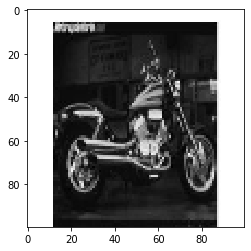

In [22]:
plt.imshow(pixels.iloc[2,:].values.reshape(100,100),cmap='gray')

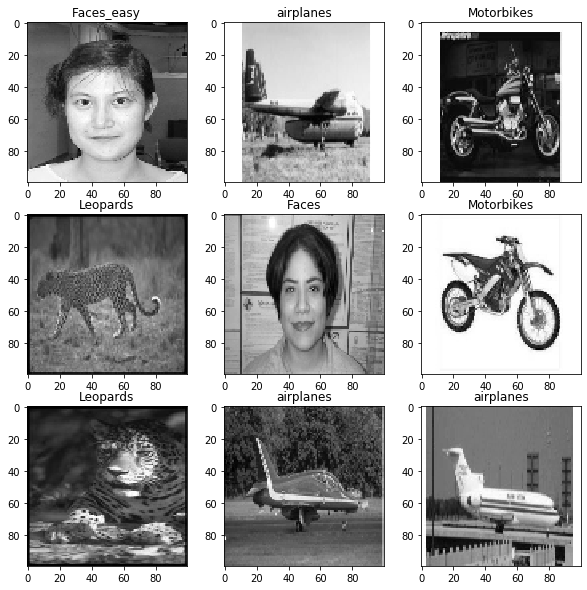

In [23]:
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(pixels.iloc[i,:].values.reshape(100,100),cmap='gray')
    plt.title(picture[i])
plt.show()


In [24]:
picture.shape

(1671,)

In [25]:

pixels=pixels.values
pixels=pixels.astype('float32')
pixels.max()

255.0

In [0]:
pixels=pixels/255  ### standardizing the pixel size between 0 and 1

In [27]:

pixels  

array([[0.32941177, 0.3254902 , 0.32156864, ..., 0.87058824, 0.87058824,
        0.8745098 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.41960785, 0.43137255, 0.4509804 , ..., 0.48235294, 0.45490196,
        0.32156864],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

## Converting the categorical target values to numericls using one hot encoding##

In [0]:

picture_dummmies=pd.get_dummies(picture)

In [29]:

picture_dummmies

,Faces,Faces_easy,Leopards,Motorbikes,airplanes,bonsai,grand_piano,watch
0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1666,0,0,0,1,0,0,0,0
1667,0,0,1,0,0,0,0,0
1668,0,0,0,1,0,0,0,0
1669,0,1,0,0,0,0,0,0


## the same can be done by the following procedure.
    from sklearn import preprocessing
    encoding=np.preprocessing
    picture_encoding=encoding.fit_transform(picture)
    picture_encoding=np.utils.to_categorically(picture_encoding,8))###

## Building the architecture of the network###

In [0]:
pixels=pixels.reshape(1671,100,100,1) ## reshape the 2D image to 3D in order to apply kernels/filters##

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pixels,picture_dummmies,test_size=0.25)

In [42]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1253, 100, 100, 1) (418, 100, 100, 1) (1253, 8) (418, 8)


In [144]:
def conv_neural_network():
    model=Sequential()
    # Convolutional layer
    model.add(Conv2D(input_shape=(100,100,1),filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu'))
    # Flatten
    model.add(Flatten())
    # Neural network
    model.add(Dense(units=1000,activation='relu',))# input connected to output
    model.add(Dropout(0.2))
    model.add(Dense(units=100,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10,activation='relu'))
    model.add(Dropout(0.2)) 

    model.add(Dense(units=8,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model

# calling baseline model
conv_nn = conv_neural_network()
print(conv_nn.summary())
# initializing tensorboard
#tfb = TensorBoard('foods')

# image generator
#train_datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#validation_datagen=ImageDataGenerator()
#train_datagen.fit(x_train_reshape)
#train_flow=train_datagen.flow(x_train,y_train,batch_size=8)
#validation_flow=validation_datagen.flow(x_test,y_test,batch_size=8)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 44, 44, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 256)      

In [0]:
conv_nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
x_train.shape

(1253, 100, 100, 1)

In [66]:
y_train.shape

(1253, 8)

In [146]:
result=conv_nn.fit(x_test,y_test,batch_size=30,epochs=50,verbose=1,validation_data=[x_test,y_test])

Train on 418 samples, validate on 418 samples
Epoch 1/50
418/418 [==============================] - 6s 14ms/step - loss: 2.0589 - acc: 0.1842 - val_loss: 2.0371 - val_acc: 0.2727
Epoch 2/50
418/418 [==============================] - 1s 3ms/step - loss: 2.0226 - acc: 0.2392 - val_loss: 1.9485 - val_acc: 0.3014
Epoch 3/50
418/418 [==============================] - 1s 2ms/step - loss: 1.9165 - acc: 0.2751 - val_loss: 1.7575 - val_acc: 0.3182
Epoch 4/50
418/418 [==============================] - 1s 3ms/step - loss: 1.7680 - acc: 0.3684 - val_loss: 1.5746 - val_acc: 0.4498
Epoch 5/50
418/418 [==============================] - 1s 3ms/step - loss: 1.4872 - acc: 0.4569 - val_loss: 1.3713 - val_acc: 0.5383
Epoch 6/50
418/418 [==============================] - 1s 3ms/step - loss: 1.3933 - acc: 0.5263 - val_loss: 1.0769 - val_acc: 0.6364
Epoch 7/50
418/418 [==============================] - 1s 3ms/step - loss: 1.0874 - acc: 0.6220 - val_loss: 0.7567 - val_acc: 0.7536
Epoch 8/50
418/418 [=========

In [0]:
data_loss_nn=pd.DataFrame(result.history)##The data loss at each epoch is converted in to a Data frame for better vizualization

In [148]:
data_loss_nn.shape ###

(50, 4)

In [149]:
data_loss_nn.head(5)

,val_loss,val_acc,loss,acc
0,2.037078,0.272727,2.058939,0.184211
1,1.948514,0.301435,2.022588,0.239234
2,1.757510,0.318182,1.916450,0.275120
3,1.574642,0.449761,1.767981,0.368421
4,1.371345,0.538278,1.487231,0.456938


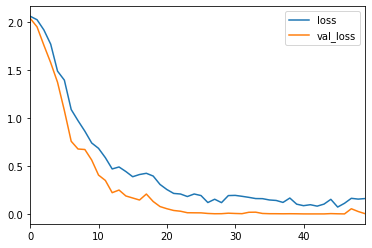

In [150]:
data_loss_nn[['loss','val_loss']].plot(kind='line')


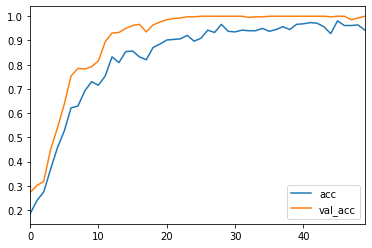

In [151]:
data_loss_nn[['acc','val_acc']].plot(kind='line')


In [0]:
### Predicting the targetusing the CNN network model###

In [0]:
picture_predict=conv_nn.predict_classes(x_test)

In [154]:
picture_predict

array([5, 3, 1, 3, 1, 3, 3, 7, 4, 0, 4, 3, 3, 1, 1, 1, 3, 0, 4, 4, 1, 1,
       4, 6, 3, 3, 3, 3, 3, 0, 4, 3, 3, 3, 7, 7, 0, 1, 1, 3, 3, 3, 4, 3,
       4, 3, 4, 2, 4, 3, 1, 7, 7, 1, 4, 3, 5, 1, 3, 4, 4, 1, 7, 2, 7, 4,
       4, 4, 4, 2, 4, 0, 4, 0, 0, 7, 0, 6, 4, 3, 4, 0, 3, 0, 3, 7, 3, 1,
       1, 2, 3, 1, 7, 4, 4, 4, 3, 4, 6, 0, 7, 3, 0, 2, 4, 3, 0, 3, 4, 4,
       4, 4, 3, 3, 3, 3, 4, 3, 7, 6, 3, 0, 4, 6, 1, 0, 1, 4, 0, 3, 2, 7,
       7, 1, 3, 1, 1, 1, 3, 1, 6, 2, 2, 1, 3, 5, 0, 3, 7, 4, 3, 3, 4, 3,
       6, 1, 3, 4, 4, 4, 7, 3, 1, 7, 3, 5, 3, 0, 3, 7, 6, 3, 3, 0, 0, 0,
       0, 7, 0, 4, 4, 3, 7, 3, 4, 0, 0, 4, 6, 3, 1, 2, 4, 3, 4, 1, 3, 4,
       4, 3, 4, 5, 3, 3, 1, 1, 3, 0, 6, 1, 3, 1, 0, 3, 4, 4, 4, 0, 5, 3,
       3, 5, 1, 1, 7, 1, 0, 1, 2, 2, 1, 4, 3, 0, 3, 2, 7, 4, 0, 3, 3, 3,
       1, 4, 4, 1, 3, 3, 4, 0, 0, 4, 3, 4, 1, 4, 4, 4, 3, 0, 4, 4, 0, 4,
       1, 3, 7, 1, 1, 4, 2, 0, 1, 7, 3, 0, 0, 5, 3, 1, 0, 0, 7, 3, 4, 0,
       5, 7, 3, 3, 3, 3, 1, 0, 0, 4, 0, 3, 3, 1, 3,

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_true=le.fit_transform(train['Labels'][y_test.index]) ###to compare the predicted value with the  true values in the test data.Inndex mapping will be handy here##

In [156]:
y_true

array([5, 3, 1, 3, 1, 3, 3, 7, 4, 0, 4, 3, 3, 1, 1, 1, 3, 0, 4, 4, 1, 1,
       4, 6, 3, 3, 3, 3, 3, 0, 4, 3, 3, 3, 7, 7, 0, 1, 1, 3, 3, 3, 4, 3,
       4, 3, 4, 2, 4, 3, 1, 7, 7, 1, 4, 3, 5, 1, 3, 4, 4, 1, 7, 2, 7, 4,
       4, 4, 4, 2, 4, 0, 4, 0, 0, 7, 0, 6, 4, 3, 4, 0, 3, 0, 3, 7, 3, 1,
       1, 2, 3, 1, 7, 4, 4, 4, 3, 4, 6, 0, 7, 3, 0, 2, 4, 3, 0, 3, 4, 4,
       4, 4, 3, 3, 3, 3, 4, 3, 7, 6, 3, 0, 4, 6, 1, 0, 1, 4, 0, 3, 2, 7,
       7, 1, 3, 1, 1, 1, 3, 1, 6, 2, 2, 1, 3, 5, 0, 3, 7, 4, 3, 3, 4, 3,
       6, 1, 3, 4, 4, 4, 7, 3, 1, 7, 3, 5, 3, 0, 3, 7, 6, 3, 3, 0, 0, 0,
       0, 7, 0, 4, 4, 3, 7, 3, 4, 0, 0, 4, 6, 3, 1, 2, 4, 3, 4, 1, 3, 4,
       4, 3, 4, 5, 3, 3, 1, 1, 3, 0, 6, 1, 3, 1, 0, 3, 4, 4, 4, 0, 5, 3,
       3, 5, 1, 1, 7, 1, 0, 1, 2, 2, 1, 4, 3, 0, 3, 2, 7, 4, 0, 3, 3, 3,
       1, 4, 4, 1, 3, 3, 4, 0, 0, 4, 3, 4, 1, 4, 4, 4, 3, 0, 4, 4, 0, 4,
       1, 3, 7, 1, 1, 4, 2, 0, 1, 7, 3, 0, 0, 5, 3, 1, 0, 0, 7, 3, 4, 0,
       5, 7, 3, 3, 3, 3, 1, 0, 0, 4, 0, 3, 3, 1, 3,

In [157]:
len(y_true)

418

In [158]:
len(picture_predict)

418

In [159]:
picture_dummmies.columns

Index(['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai',
       'grand_piano', 'watch'],
      dtype='object')

In [160]:
le.classes_

array(['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes',
       'bonsai', 'grand_piano', 'watch'], dtype=object)

In [161]:
print(len(picture_dummmies.columns),len(le.classes_)) ## the column lengths should atch as they are derived rom the same target variable

8 8


In [0]:

from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import cohen_kappa_score, roc_auc_score

from sklearn.metrics import log_loss

def classification_metric(y_test,picture_predict,label):
    # confusion matrix
    cm = confusion_matrix(y_test,picture_predict)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='cool',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)

    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    classification = classification_report(y_true,picture_predict)
    print(classification)
    

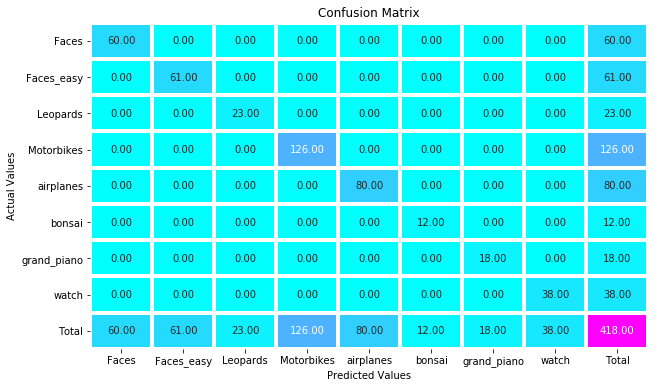

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00       126
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        38

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [163]:
classification_metric(picture_predict,y_true,label=['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai','grand_piano', 'watch'])

In [0]:
test=df_test

In [171]:
test.shape

(1118, 10001)

In [164]:
test.columns

Index(['Labels', 'pixels0', 'pixels1', 'pixels2', 'pixels3', 'pixels4',
       'pixels5', 'pixels6', 'pixels7', 'pixels8',
       ...
       'pixels9990', 'pixels9991', 'pixels9992', 'pixels9993', 'pixels9994',
       'pixels9995', 'pixels9996', 'pixels9997', 'pixels9998', 'pixels9999'],
      dtype='object', length=10001)

In [0]:
test_picture=test['Labels']

In [0]:
test_pixels=test.drop('Labels',axis=1)

In [0]:
test_pixels=test_pixels.values
test_pixels=test_pixels.astype('float64')
test_pixels=test_pixels/test_pixels.max()

In [0]:
test_Labels=test['Labels']

In [0]:
test_pixels=test_pixels.reshape(1118,100,100,1)
predcited_images_testdata=conv_nn.predict_classes(test_pixels)

In [177]:
predcited_images_testdata

array([6, 2, 1, ..., 1, 4, 0])

In [178]:
  len(predcited_images_testdata)

1118

In [0]:
test_true=le.transform(test_Labels)

In [184]:
len(test_true)

1118

In [200]:
print('*'*30+'Classifcation Report'+'*'*30)
classification=classification_report(test_true,predcited_images_testdata)
classification

******************************Classifcation Report******************************


'              precision    recall  f1-score   support\n\n           0       0.73      0.76      0.75       176\n           1       0.97      0.93      0.95       179\n           2       0.43      0.55      0.48        83\n           3       0.95      0.96      0.96       310\n           4       0.83      0.87      0.85       181\n           5       0.40      0.21      0.28        57\n           6       0.36      0.72      0.48        36\n           7       0.90      0.47      0.62        96\n\n    accuracy                           0.79      1118\n   macro avg       0.70      0.68      0.67      1118\nweighted avg       0.81      0.79      0.79      1118\n'

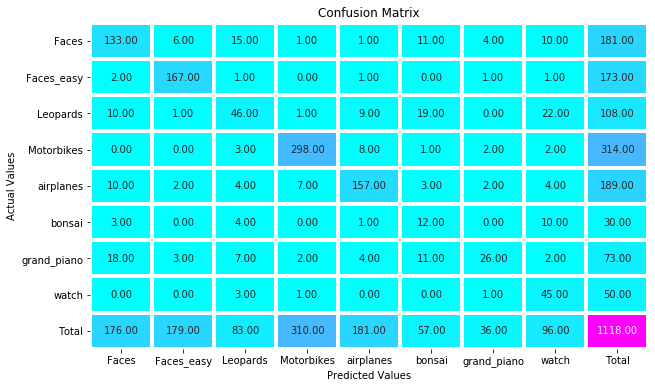

******************************Classifcation Report******************************




ValueError: ignored

In [201]:

classification_metric(predcited_images_testdata,test_true,label=['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai','grand_piano', 'watch'])



ValueError: ignored

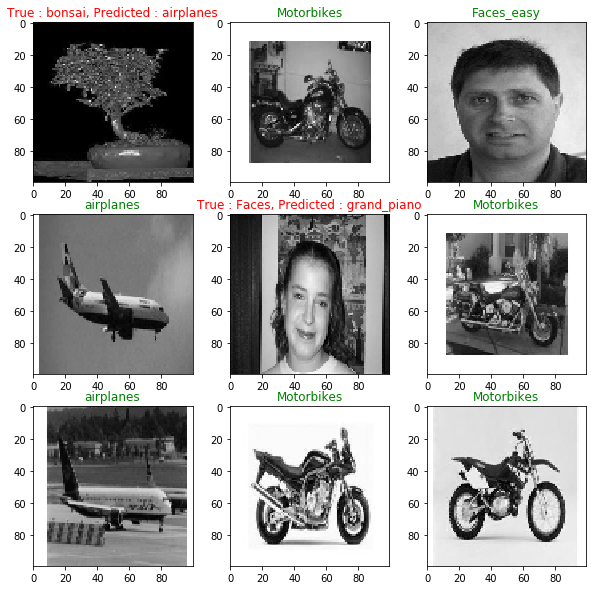

In [202]:
### plotting the predcted images w.r.t to model predicted images##
plt.figure(figsize=(10,10))
for num,i in enumerate(range(10,20)):
  #a=num+1
  plt.subplot(3,3,num+1)
  plt.imshow(test.iloc[i,1:].astype('float64').values.reshape(100,100),cmap='gray')
  if test_true[i]==predcited_images_testdata[i]:
    plt.title(test['Labels'][i],color='green')
  else:
    plt.title('True : {}, Predicted : {}'.format(test['Labels'][i],le.classes_[predcited_images_testdata[i]]),color='red')
plt.show()

In [0]:
######End########